In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("13-car_evaluation.csv")

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [7]:
# OLMASI GEREKEN BAŞLIKLAR
# vhigh => buying price
# vhigh.1 => maintenance cost
# 2 => number of doors
# 2.1 => number of persons
# small => lug_boot
# low => safety
# unacc => decision

In [8]:
col_names = ["buying_price","maintenance_cost","doors","persons","lug_boot","safety","decision"]
df.columns = col_names

In [9]:
df.head()

,buying_price,maintenance_cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
for col in df:
    print(df[col].value_counts())

buying_price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance_cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
decision
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
#doors ve person numeric yapılır. geri kalanı categorical(encoding yapılacak)

In [12]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [13]:
df["doors"] = df["doors"].replace("5more","5")

In [14]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [15]:
df["doors"] = df["doors"].astype(int)

In [16]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [17]:
df["persons"] = df["persons"].replace("more","5")

In [18]:
df["persons"].unique()

array(['2', '4', '5'], dtype=object)

In [19]:
df["persons"] = df["persons"].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying_price      1727 non-null   object
 1   maintenance_cost  1727 non-null   object
 2   doors             1727 non-null   int64 
 3   persons           1727 non-null   int64 
 4   lug_boot          1727 non-null   object
 5   safety            1727 non-null   object
 6   decision          1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


<Axes: xlabel='buying_price', ylabel='maintenance_cost'>

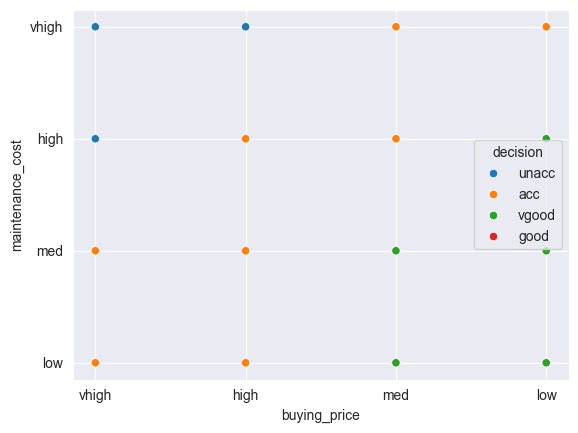

In [21]:
sns.scatterplot(x=df["buying_price"], y=df["maintenance_cost"],hue=df["decision"])

<Axes: xlabel='buying_price', ylabel='maintenance_cost'>

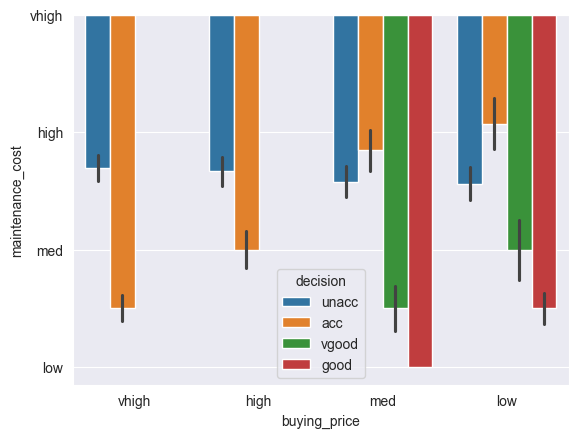

In [22]:
sns.barplot(x=df["buying_price"], y=df["maintenance_cost"],hue=df["decision"])

In [23]:
X = df.drop("decision",axis=1)
y = df["decision"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
categorical_cols = ["buying_price","maintenance_cost","lug_boot","safety"]
numerical_cols = ["doors","persons"]
ordinal_encoder = OrdinalEncoder(categories=[
    ["low","med","high","vhigh"],# buying
    ["low","med","high","vhigh"],# maint
    ["small","med","big"],# lug_boot
    ["low","med","high"]# safety
])

#birden fazla yapmak için
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal_encoder", ordinal_encoder, categorical_cols),
    ],remainder="passthrough"
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [27]:
pd.DataFrame(X_train_transformed)[1].unique()

array([1., 0., 2., 3.])

In [28]:
for x in categorical_cols:
    print(df[x].value_counts())

buying_price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance_cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree_model =  DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=3)
tree_model.fit(X_train_transformed, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = tree_model.predict(X_test_transformed)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 79  14   0   0]
 [  0  19   0   0]
 [ 42   0 263   0]
 [  4  11   0   0]]
              precision    recall  f1-score   support

         acc       0.63      0.85      0.72        93
        good       0.43      1.00      0.60        19
       unacc       1.00      0.86      0.93       305
       vgood       0.00      0.00      0.00        15

    accuracy                           0.84       432
   macro avg       0.52      0.68      0.56       432
weighted avg       0.86      0.84      0.84       432

0.8356481481481481


C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

[Text(0.25, 0.9, 'safety <= 0.5\nentropy = 1.209\nsamples = 1295\nvalue = [291, 50, 904, 50]'),
 Text(0.125, 0.7, 'entropy = 0.0\nsamples = 436\nvalue = [0, 0, 436, 0]'),
 Text(0.1875, 0.8, 'True  '),
 Text(0.375, 0.7, 'persons <= 3.0\nentropy = 1.484\nsamples = 859\nvalue = [291.0, 50.0, 468.0, 50.0]'),
 Text(0.3125, 0.8, '  False'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 281\nvalue = [0, 0, 281, 0]'),
 Text(0.5, 0.5, 'buying_price <= 1.5\nentropy = 1.636\nsamples = 578\nvalue = [291.0, 50.0, 187.0, 50.0]'),
 Text(0.25, 0.3, 'maintenance_cost <= 1.5\nentropy = 1.725\nsamples = 298\nvalue = [160, 50, 38, 50]'),
 Text(0.125, 0.1, 'entropy = 1.797\nsamples = 148\nvalue = [49, 50, 8, 41]'),
 Text(0.375, 0.1, 'entropy = 1.029\nsamples = 150\nvalue = [111, 0, 30, 9]'),
 Text(0.75, 0.3, 'maintenance_cost <= 2.5\nentropy = 0.997\nsamples = 280\nvalue = [131, 0, 149, 0]'),
 Text(0.625, 0.1, 'entropy = 0.943\nsamples = 205\nvalue = [131, 0, 74, 0]'),
 Text(0.875, 0.1, 'entropy = 0.0\nsample

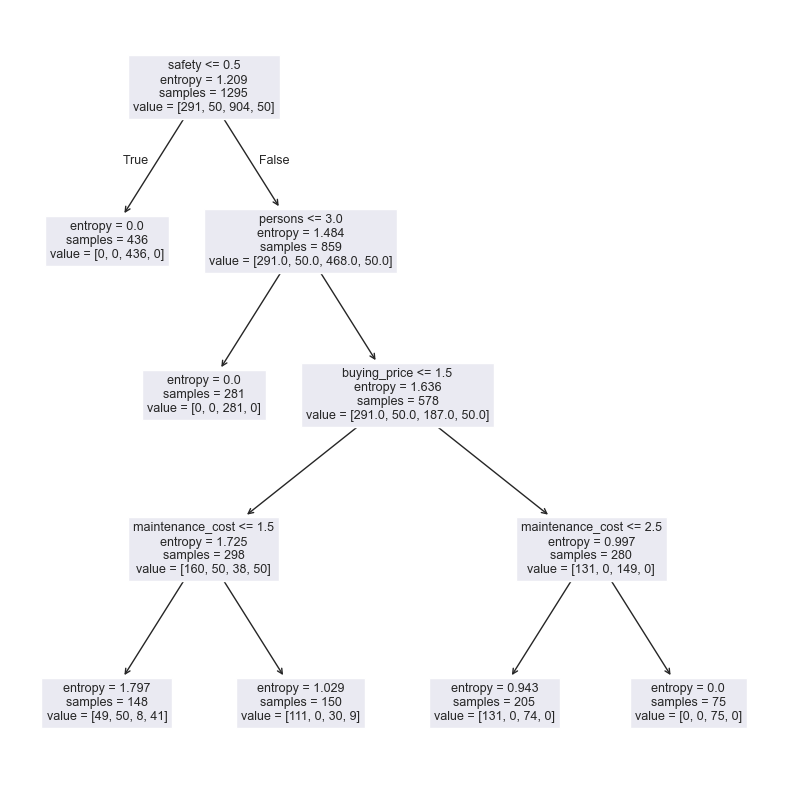

In [33]:
plt.figure(figsize = (10,10))
from sklearn import tree
column_names = categorical_cols + numerical_cols
tree.plot_tree(tree_model, feature_names=column_names)

In [34]:
#hyperparameter tuning

In [35]:
param = {
    "criterion": ["gini", "entropy","log_loss"],
    "max_depth": [1,2,3,4,5,6,15,None],
    "splitter": ["best","random"],
    "max_features": ["auto","sqrt","log2",None],
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(estimator=tree_model, param_grid=param, cv=5, scoring="accuracy")

In [38]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed, y_train)
y_pred2 = grid.predict(X_test_transformed)

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [40]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[ 91   0   1   1]
 [  3  16   0   0]
 [  2   0 303   0]
 [  0   0   0  15]]
              precision    recall  f1-score   support

         acc       0.95      0.98      0.96        93
        good       1.00      0.84      0.91        19
       unacc       1.00      0.99      1.00       305
       vgood       0.94      1.00      0.97        15

    accuracy                           0.98       432
   macro avg       0.97      0.95      0.96       432
weighted avg       0.98      0.98      0.98       432

0.9837962962962963


hyperparameter tuning yaptık çıkan sonucun aynısını yaptık sadece

In [41]:
tree_model_new = DecisionTreeClassifier(criterion="gini",max_depth=None,max_features=None,splitter="best")
tree_model_new.fit(X_train_transformed, y_train)
y_pred3 = tree_model_new.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[ 91   0   1   1]
 [  3  16   0   0]
 [  2   0 303   0]
 [  0   0   0  15]]
              precision    recall  f1-score   support

         acc       0.95      0.98      0.96        93
        good       1.00      0.84      0.91        19
       unacc       1.00      0.99      1.00       305
       vgood       0.94      1.00      0.97        15

    accuracy                           0.98       432
   macro avg       0.97      0.95      0.96       432
weighted avg       0.98      0.98      0.98       432

0.9837962962962963


[Text(0.5986842105263158, 0.9615384615384616, 'safety <= 0.5\ngini = 0.459\nsamples = 1295\nvalue = [291, 50, 904, 50]'),
 Text(0.5855263157894737, 0.8846153846153846, 'gini = 0.0\nsamples = 436\nvalue = [0, 0, 436, 0]'),
 Text(0.5921052631578947, 0.9230769230769231, 'True  '),
 Text(0.6118421052631579, 0.8846153846153846, 'persons <= 3.0\ngini = 0.582\nsamples = 859\nvalue = [291.0, 50.0, 468.0, 50.0]'),
 Text(0.6052631578947368, 0.9230769230769231, '  False'),
 Text(0.5986842105263158, 0.8076923076923077, 'gini = 0.0\nsamples = 281\nvalue = [0, 0, 281, 0]'),
 Text(0.625, 0.8076923076923077, 'buying_price <= 1.5\ngini = 0.627\nsamples = 578\nvalue = [291.0, 50.0, 187.0, 50.0]'),
 Text(0.3881578947368421, 0.7307692307692307, 'maintenance_cost <= 1.5\ngini = 0.639\nsamples = 298\nvalue = [160, 50, 38, 50]'),
 Text(0.19407894736842105, 0.6538461538461539, 'safety <= 1.5\ngini = 0.697\nsamples = 148\nvalue = [49, 50, 8, 41]'),
 Text(0.07894736842105263, 0.5769230769230769, 'lug_boot <= 0.

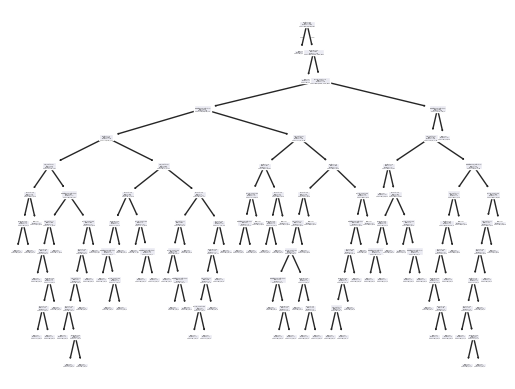

In [42]:
tree.plot_tree(tree_model_new, feature_names=column_names)

In [43]:
df_new = pd.read_csv("11-iris.csv")

In [44]:
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
X = df_new.drop("Species",axis=1)
y = df_new["Species"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [53]:
tree_model = DecisionTreeClassifier()

In [54]:
tree_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.6, 0.8333333333333334, 'Id <= 100.5\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.4, 0.5, 'PetalLengthCm <= 2.45\ngini = 0.499\nsamples = 77\nvalue = [40.0, 37.0, 0.0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]'),
 Text(0.7, 0.6666666666666667, '  False')]

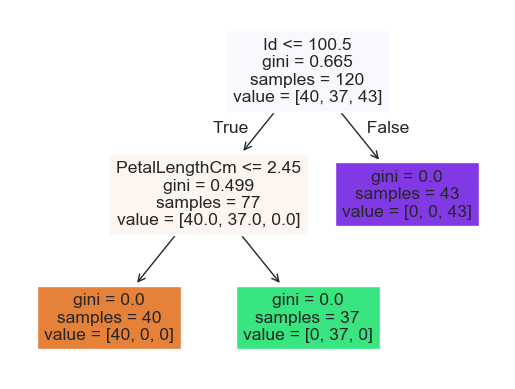

In [55]:
tree.plot_tree(tree_model.fit(X_train,y_train), feature_names=X_train.columns,filled=True)